In [1]:
import numpy as np
import pandas as pd
import branca
from scipy.interpolate import griddata
import geojsoncontour
import geopandas as gpd
import json
import datetime as dt
import matplotlib.pyplot as plt
import os

In [2]:
masterxr = pd.read_pickle("mastertest.pkl")

In [3]:
def getGeoJSON(time,altimetry):
    altslice = altimetry[altimetry['time'] == pd.to_datetime(time)]
    coordinates = altslice[['latitude','longitude','adt']]
    coordinates = coordinates.drop_duplicates()

    x_orig = np.asarray(coordinates.longitude.tolist())
    y_orig = np.asarray(coordinates.latitude.tolist())
    z_orig = np.asarray(coordinates.adt.tolist())

    colors = ['#0000ff','#0099cc','#009999','#ccff66','#ffff66','#ffcc00','#ff6600','#cc0000']
    x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
    y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
    x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
    z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')

    levels = len(colors)
    vmin   = min(altimetry["adt"].unique().tolist())
    vmax   = max(altimetry["adt"].unique().tolist())
    cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)



    contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None',antialiased=True, vmin=vmin, vmax=vmax)

    geojson = geojsoncontour.contourf_to_geojson(
        contourf=contourf,
        min_angle_deg=3.0,
        ndigits=5,
        stroke_width=1,
        fill_opacity=0.5)
    #cm.caption = 'Significant Wave Height (m)'

    df2 = gpd.read_file('palauEEZ.geojson')
    with open("transitionary_altimetry.geojson", "w") as text_file:
        text_file.write(geojson)
    df1 = gpd.read_file("transitionary_altimetry.geojson")
    df3 = gpd.read_file('palau.geojson')
    df3 =df3.drop(['type','id','tags','meta'],axis = 1)
    df3 = df3[df3.geometry.type != 'LineString']
    merged = gpd.overlay(df2,df1, how='intersection')
    merged = gpd.overlay(merged,df3, how='difference')
    merged_json = merged.to_json()

    R,G,B = [], [],[]
    for color in merged['fill'].tolist():
        r,g,b = [int(str(color[1:])[i:i+2], 16) for i in (0, 2, 4)]
        R.append(r)
        G.append(g)
        B.append(b)
    merged['R'] = R
    merged['G'] = G
    merged['B'] = B
    mergedrgb_json = merged.to_json()
    loaded = json.loads(mergedrgb_json)
    return loaded

In [4]:
def getMonthlyGeoJSON(year,month,altimetry):
    
    altslice = altimetry[(altimetry['time'].dt.year == year) & (altimetry['time'].dt.month == month)]
    altslice = altslice.groupby(["latitude","longitude"]).mean()
    altslice = altslice.reset_index()
    
    coordinates = altslice[['latitude','longitude','adt']]
    coordinates = coordinates.drop_duplicates()

    x_orig = np.asarray(coordinates.longitude.tolist())
    y_orig = np.asarray(coordinates.latitude.tolist())
    z_orig = np.asarray(coordinates.adt.tolist())

    colors = ['#0000ff','#0099cc','#009999','#ccff66','#ffff66','#ffcc00','#ff6600','#cc0000']
    x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
    y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
    x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
    z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')

    levels = len(colors)
    vmin   = min(altimetry["adt"].unique().tolist())
    vmax   = max(altimetry["adt"].unique().tolist())
    cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)



    contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None',antialiased=True, vmin=vmin, vmax=vmax)

    geojson = geojsoncontour.contourf_to_geojson(
        contourf=contourf,
        min_angle_deg=3.0,
        ndigits=5,
        stroke_width=1,
        fill_opacity=0.5)
    #cm.caption = 'Significant Wave Height (m)'

    df2 = gpd.read_file('palauEEZ.geojson')
    with open("transitionary_altimetry.geojson", "w") as text_file:
        text_file.write(geojson)
    df1 = gpd.read_file("transitionary_altimetry.geojson")
    df3 = gpd.read_file('palau.geojson')
    df3 =df3.drop(['type','id','tags','meta'],axis = 1)
    df3 = df3[df3.geometry.type != 'LineString']
    merged = gpd.overlay(df2,df1, how='intersection')
    merged = gpd.overlay(merged,df3, how='difference')
    merged_json = merged.to_json()

    R,G,B = [], [],[]
    for color in merged['fill'].tolist():
        r,g,b = [int(str(color[1:])[i:i+2], 16) for i in (0, 2, 4)]
        R.append(r)
        G.append(g)
        B.append(b)
    merged['R'] = R
    merged['G'] = G
    merged['B'] = B
    mergedrgb_json = merged.to_json()
    loaded = json.loads(mergedrgb_json)
    return loaded

In [9]:
folder = '/Volumes/PACIOOS/altimetryjson/'
folder+"altimetrygeo" + str(1993)+str(12)+ ".json"

'/Volumes/PACIOOS/altimetryjson/altimetrygeo199312.json'

/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19931.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19932.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19933.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19934.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19935.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19936.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19937.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19938.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19939.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199310.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199311.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199312.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19941.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19942.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19943.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19944.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19945.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19946.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19947.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19948.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19949.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199410.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199411.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199412.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19951.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19952.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19953.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19954.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19955.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19956.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19957.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19958.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19959.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199510.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199511.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199512.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19961.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19962.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19963.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19964.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19965.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19966.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19967.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19968.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19969.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199610.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199611.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199612.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19971.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19972.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19973.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19974.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19975.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19976.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19977.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19978.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19979.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199710.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199711.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199712.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19981.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19982.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19983.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19984.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19985.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19986.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19987.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19988.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19989.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199810.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199811.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199812.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19991.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19992.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19993.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19994.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19995.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19996.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19997.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19998.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo19999.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199910.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199911.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo199912.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20001.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20002.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20003.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20004.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20005.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20006.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20007.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20008.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20009.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200010.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200011.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200012.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20011.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20012.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20013.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20014.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20015.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20016.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20017.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20018.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20019.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200110.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200111.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200112.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20021.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20022.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20023.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20024.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20025.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20026.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20027.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20028.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20029.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200210.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200211.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200212.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20031.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20032.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20033.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20034.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20035.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20036.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20037.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20038.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20039.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200310.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200311.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200312.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20041.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20042.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20043.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20044.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20045.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20046.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20047.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20048.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20049.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200410.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200411.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200412.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20051.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20052.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20053.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20054.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20055.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20056.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20057.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20058.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20059.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200510.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200511.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200512.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20061.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20062.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20063.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20064.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20065.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20066.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20067.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20068.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20069.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200610.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200611.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200612.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20071.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20072.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20073.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20074.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20075.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20076.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20077.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20078.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20079.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200710.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200711.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200712.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20081.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20082.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20083.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20084.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20085.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20086.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20087.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20088.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20089.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200810.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200811.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200812.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20091.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20092.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20093.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20094.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20095.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20096.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20097.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20098.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20099.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200910.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200911.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo200912.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20101.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20102.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20103.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20104.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20105.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20106.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20107.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20108.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20109.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201010.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201011.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201012.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20111.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20112.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20113.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20114.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20115.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20116.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20117.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20118.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20119.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201110.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201111.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201112.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20121.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20122.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20123.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20124.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20125.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20126.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20127.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20128.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20129.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201210.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201211.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201212.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20131.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20132.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20133.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20134.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20135.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20136.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20137.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20138.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20139.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201310.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201311.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201312.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20141.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20142.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20143.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20144.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20145.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20146.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20147.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20148.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20149.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201410.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201411.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201412.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20151.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20152.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20153.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20154.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20155.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20156.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20157.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20158.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20159.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201510.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201511.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201512.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20161.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20162.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20163.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20164.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20165.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20166.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20167.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20168.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20169.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201610.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201611.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201612.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20171.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20172.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20173.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20174.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20175.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20176.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20177.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20178.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20179.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201710.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201711.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201712.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20181.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20182.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20183.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20184.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20185.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20186.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20187.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20188.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20189.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201810.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201811.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201812.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20191.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20192.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20193.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20194.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20195.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20196.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20197.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20198.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20199.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201910.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201911.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo201912.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20201.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20202.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20203.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20204.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20205.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20206.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20207.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20208.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20209.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo202010.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo202011.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo202012.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20211.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20212.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20213.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20214.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20215.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20216.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20217.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20218.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20219.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo202110.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo202111.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo202112.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20221.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20222.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20223.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20224.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20225.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


/Volumes/PACIOOS/altimetryjson/altimetrygeo20226.json


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_5148/1751344831.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  altslice = altslice.groupby(["latitude","longitude"]).mean()


ValueError: zero-size array to reduction operation minimum which has no identity

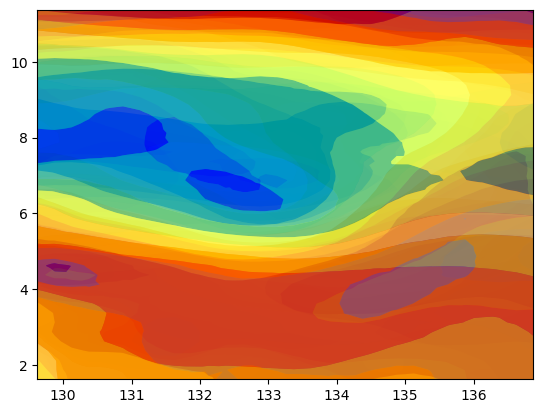

In [55]:
folder = '/Volumes/PACIOOS/altimetryjson/'
for year in range(1993,2022+1):
    for month in range(1,12+1):
        if folder+"altimetrygeo" + str(year)+str(month)+ ".json" in os.listdir(folder):
        currgeo = getMonthlyGeoJSON(year,month,masterxr)
        json_object = json.dumps(currgeo, indent=4)
        with open(folder+"altimetrygeo" + str(year)+str(month)+ ".json", "w") as outfile:
            outfile.write(json_object)
        print(folder+"altimetrygeo" + str(year)+str(month)+ ".json")

In [10]:
folder = '/Volumes/PACIOOS/altimetryjsondaily/'
# folder+"altimetrygeo" + pd.to_datetime(x).strftime("%Y%m%d") + ".json"

In [13]:
os.listdir(folder)

['altimetrygeo19930101.json',
 'altimetrygeo19930102.json',
 'altimetrygeo19930103.json',
 'altimetrygeo19930104.json',
 'altimetrygeo19930105.json',
 'altimetrygeo19930106.json',
 'altimetrygeo19930108.json',
 'altimetrygeo19930109.json',
 'altimetrygeo19930110.json',
 'altimetrygeo19930111.json',
 'altimetrygeo19930112.json',
 'altimetrygeo19930113.json',
 'altimetrygeo19930114.json',
 'altimetrygeo19930115.json',
 'altimetrygeo19930116.json',
 'altimetrygeo19930117.json',
 'altimetrygeo19930118.json',
 'altimetrygeo19930119.json',
 'altimetrygeo19930120.json',
 'altimetrygeo19930121.json',
 'altimetrygeo19930122.json',
 'altimetrygeo19930123.json',
 'altimetrygeo19930124.json',
 'altimetrygeo19930125.json',
 'altimetrygeo19930126.json',
 'altimetrygeo19930127.json',
 'altimetrygeo19930128.json',
 'altimetrygeo19930129.json',
 'altimetrygeo19930130.json',
 'altimetrygeo19930131.json',
 'altimetrygeo19930201.json',
 'altimetrygeo19930202.json',
 'altimetrygeo19930203.json',
 'altimetr

error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error


/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


error
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220406.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220415.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220416.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220417.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220418.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220509.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220510.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220511.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220512.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220513.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220514.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220515.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220516.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220517.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220518.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220519.json
/V

/opt/anaconda3/envs/pydeck/lib/python3.9/site-packages/geojsoncontour/utilities/multipoly.py:33: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220603.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220604.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220605.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220606.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220608.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220609.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220610.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220611.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220612.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220613.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220614.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220615.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220616.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220617.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220618.json
/Volumes/PACIOOS/altimetryjsondaily/altimetrygeo20220619.json
/Volumes

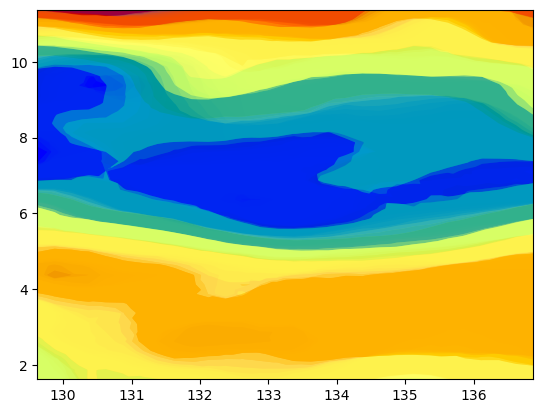

In [7]:
folder = '/Volumes/PACIOOS/altimetryjsondaily/'
for x in masterxr["time"].unique().tolist():
    if "altimetrygeo" + pd.to_datetime(x).strftime("%Y%m%d") + ".json" in os.listdir(folder):
        continue
    else:
        try:
            currgeo = getGeoJSON(x,masterxr)
            json_object = json.dumps(currgeo, indent=4)
            with open(folder+"altimetrygeo" + pd.to_datetime(x).strftime("%Y%m%d") + ".json", "w") as outfile:
                outfile.write(json_object)
            print(folder+"altimetrygeo" + pd.to_datetime(x).strftime("%Y%m%d") + ".json")
        except:
            print("error")

In [36]:
masterxr

,time,latitude,longitude,adt
363688,1993-01-01,1.625,129.625,0.8945
363689,1993-01-01,1.625,129.875,0.9142
363690,1993-01-01,1.625,130.125,0.9291
363691,1993-01-01,1.625,130.375,0.9306
363692,1993-01-01,1.625,130.625,0.9345
...,...,...,...,...
388071,2022-06-23,11.375,135.875,1.2896
388072,2022-06-23,11.375,136.125,1.2976
388073,2022-06-23,11.375,136.375,1.3016
388074,2022-06-23,11.375,136.625,1.3044


In [41]:
testing = masterxr[(masterxr['time'].dt.year == 1993) & (masterxr['time'].dt.month == 1)]

In [5]:
masterxr

,time,latitude,longitude,adt
363688,1993-01-01,1.625,129.625,0.8945
363689,1993-01-01,1.625,129.875,0.9142
363690,1993-01-01,1.625,130.125,0.9291
363691,1993-01-01,1.625,130.375,0.9306
363692,1993-01-01,1.625,130.625,0.9345
...,...,...,...,...
388071,2022-06-23,11.375,135.875,1.2896
388072,2022-06-23,11.375,136.125,1.2976
388073,2022-06-23,11.375,136.375,1.3016
388074,2022-06-23,11.375,136.625,1.3044


In [6]:
masterxr.to_csv('altimetry20220623.csv',index=False)